<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
    Import Data Set
</div>


In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

In [270]:
Train = pd.read_csv('DailyDelhiClimateTrain.csv',
                 index_col='date',
                 parse_dates=True
                )
Test = pd.read_csv('DailyDelhiClimateTest.csv',
                 index_col='date',
                 parse_dates=True
                )

In [271]:
df = pd.concat([Train,Test])

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1576 entries, 2013-01-01 to 2017-04-24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1576 non-null   float64
 1   humidity      1576 non-null   float64
 2   wind_speed    1576 non-null   float64
 3   meanpressure  1576 non-null   float64
dtypes: float64(4)
memory usage: 61.6 KB


### Hiểu dữ liệu

meantemp ==> Nhiệt độ trung bình tính trung bình từ nhiều khoảng thời gian 3 giờ trong một ngày.

humidity ==> Giá trị độ ẩm trong ngày (đơn vị là gam hơi nước trên mét khối không khí).

wind_speed ==> Tốc độ gió đo bằng km/h.

meanpressure ==> Đo áp suất thời tiết (đo bằng atm)

In [273]:
df.head(5)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000,84.500,0.000,1015.667
2013-01-02,7.400,92.000,2.980,1017.800
2013-01-03,7.167,87.000,4.633,1018.667
2013-01-04,8.667,71.333,1.233,1017.167
2013-01-05,6.000,86.833,3.700,1016.500


In [274]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantemp,1576.000,25.222,7.345,6.000,18.500,27.167,31.143,38.714
humidity,1576.000,60.445,16.980,13.429,49.750,62.440,72.125,100.000
wind_speed,1576.000,6.899,4.511,0.000,3.700,6.364,9.262,42.220
meanpressure,1576.000,1010.593,175.243,-3.042,1001.875,1009.056,1015.200,7679.333


In [275]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [276]:
df.head(3)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000,84.500,0.000,1015.667
2013-01-02,7.400,92.000,2.980,1017.800
2013-01-03,7.167,87.000,4.633,1018.667


<Figure size 1200x1000 with 0 Axes>

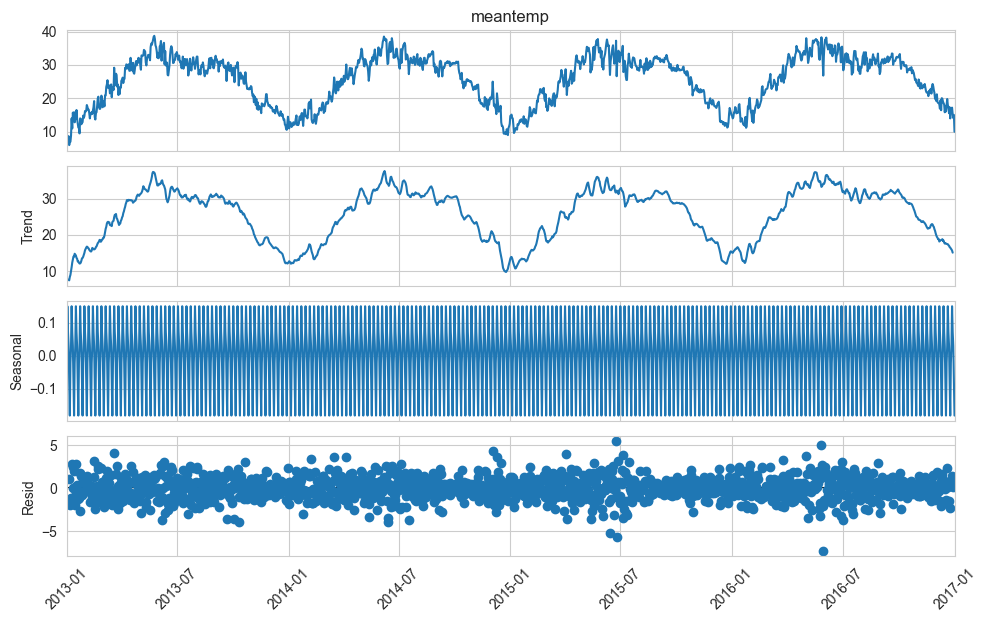

In [341]:
plt.figure(figsize=(12, 10))
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Train["meantemp"][:], model="additive")
decomposition.plot()
plt.xticks(rotation=45)
plt.show()

- Biểu đồ thường và biểu đồ xu hướng nhìn vào thấy được xu hướng tổng quan của dữ liệu theo thời gian: nhiệt độ tăng vào mùa hè từ tháng 4 đến tháng 7 đỉnh điểm là tháng 6 hàng năm, và nhiệt độ giảm vào mùa đông và nhiệt độ thấp nhất vào tháng 1 hàng năm.
- Biểu đồ Seasonal cho thấy nhiệt độ trung bình trong ngày có xu hướng tăng theo thời gian, nhưng cũng có biến đổi theo mùa rõ ràng với nhiệt độ cao hơn vào mùa hè và thấp hơn vào mùa đông. Biểu đồ mùa vụ cho thấy biến động tăng hoặc giảm lặp đi lặp lại theo mùa theo năm.
- Biểu đồ Resid ( Biểu đồ nhiễu) cho thấy những dữ liệu nhiệt độ thay đổi bất thường khó có thể giải thích và dự đoán trước


In [278]:
df["year"] = df.index.year
df['month'] = df.index.month 
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour 
df["date"] = df.index.date

In [279]:
df.head(10)

,meantemp,humidity,wind_speed,meanpressure,year,month,day,dayofweek,hour,date
date,,,,,,,,,,
2013-01-01,10.000,84.500,0.000,1015.667,2013,1,1,1,0,2013-01-01
2013-01-02,7.400,92.000,2.980,1017.800,2013,1,2,2,0,2013-01-02
2013-01-03,7.167,87.000,4.633,1018.667,2013,1,3,3,0,2013-01-03
2013-01-04,8.667,71.333,1.233,1017.167,2013,1,4,4,0,2013-01-04
2013-01-05,6.000,86.833,3.700,1016.500,2013,1,5,5,0,2013-01-05
2013-01-06,7.000,82.800,1.480,1018.000,2013,1,6,6,0,2013-01-06
2013-01-07,7.000,78.600,6.300,1020.000,2013,1,7,0,0,2013-01-07
2013-01-08,8.857,63.714,7.143,1018.714,2013,1,8,1,0,2013-01-08
2013-01-09,14.000,51.250,12.500,1017.000,2013,1,9,2,0,2013-01-09


In [280]:
df.tail(10)

,meantemp,humidity,wind_speed,meanpressure,year,month,day,dayofweek,hour,date
date,,,,,,,,,,
2017-04-15,31.222,30.444,5.967,1002.444,2017,4,15,5,0,2017-04-15
2017-04-16,31.000,34.250,2.100,1003.250,2017,4,16,6,0,2017-04-16
2017-04-17,32.556,38.444,5.367,1004.444,2017,4,17,0,0,2017-04-17
2017-04-18,34.000,27.333,7.811,1003.111,2017,4,18,1,0,2017-04-18
2017-04-19,33.500,24.125,9.025,1000.875,2017,4,19,2,0,2017-04-19
2017-04-20,34.500,27.500,5.562,998.625,2017,4,20,3,0,2017-04-20
2017-04-21,34.250,39.375,6.963,999.875,2017,4,21,4,0,2017-04-21
2017-04-22,32.900,40.900,8.890,1001.600,2017,4,22,5,0,2017-04-22
2017-04-23,32.875,27.500,9.963,1002.125,2017,4,23,6,0,2017-04-23


In [281]:
df['date'].diff().dropna().iloc[0]

Timedelta('1 days 00:00:00')

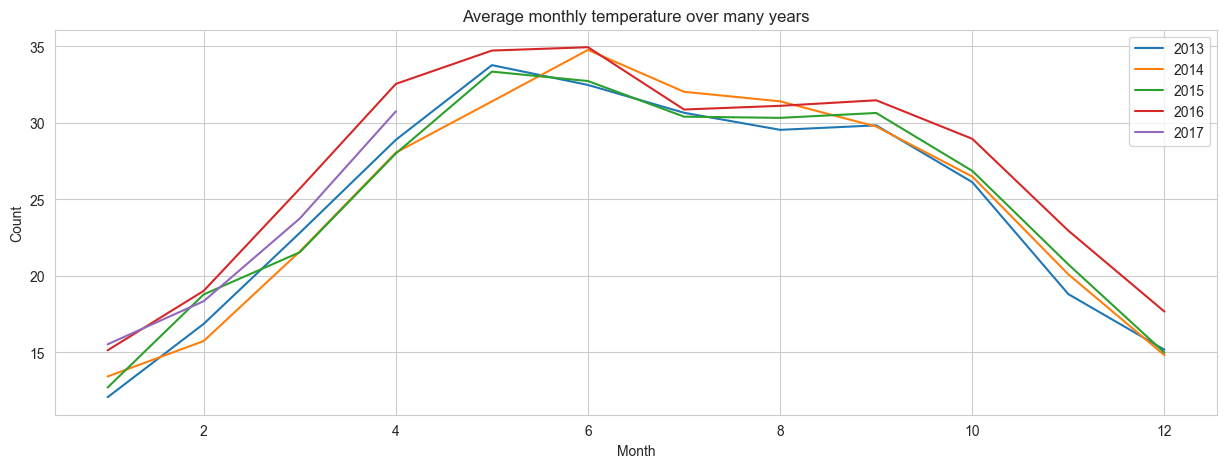

In [282]:
year_month_cnt = df.groupby(["year", "month"])["meantemp"].mean()    

plt.figure(figsize=(15,5))       
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Average monthly temperature over many years')
plt.show()

In [283]:
df.head(1)

,meantemp,humidity,wind_speed,meanpressure,year,month,day,dayofweek,hour,date
date,,,,,,,,,,
2013-01-01,10.000,84.500,0.000,1015.667,2013,1,1,1,0,2013-01-01


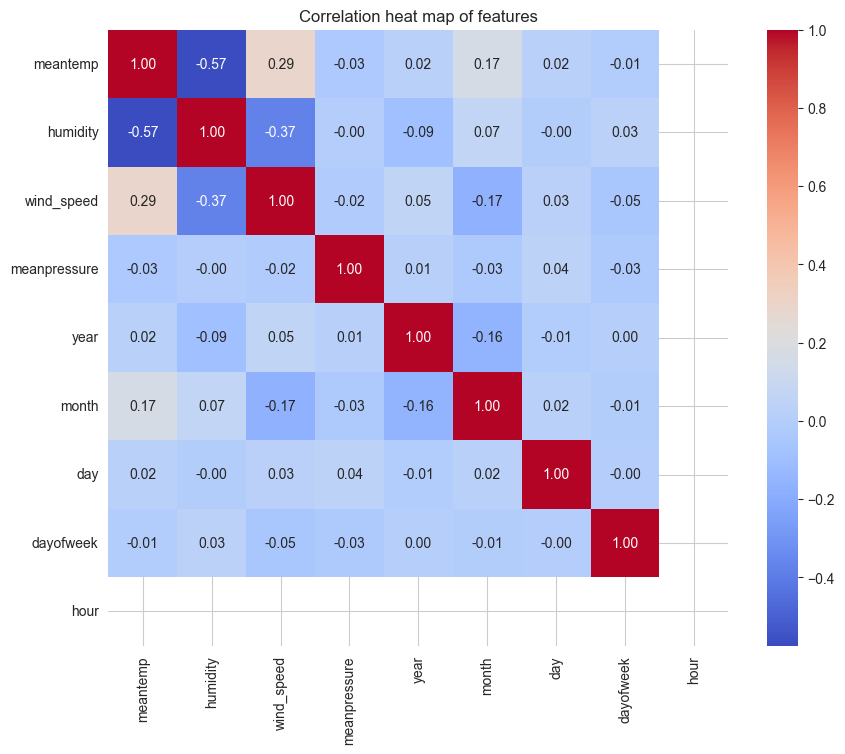

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df[['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'year', 'month', 'day', 'dayofweek', 'hour']]

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation heat map of features')
plt.show()


In [285]:
data = df.drop(["year","month","day","dayofweek","hour","date"], axis=1)

<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
    Data Pre-Processing
</div>


In [286]:
data.shape

(1576, 4)

In [287]:
train_size = int(len(data) * 0.9)
test_size = len(data) - train_size

train, test = data.iloc[0:train_size], data.iloc[train_size:len(df)]
print(len(train), len(test))

1418 158


In [288]:
train.shape

(1418, 4)

In [289]:
test.shape

(158, 4)

In [290]:
train.head(1)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000,84.500,0.000,1015.667


<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
    Scaling
</div>


In [291]:
from sklearn.preprocessing import RobustScaler

In [292]:
f_columns = ['meanpressure', 'humidity', 'wind_speed']

f_transformer = RobustScaler()   
target_transformer = RobustScaler()   

train.loc[:, f_columns] = f_transformer.fit_transform(train[f_columns])
train['meantemp'] = target_transformer.fit_transform(train[['meantemp']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns])

test['meantemp'] = target_transformer.transform(test[['meantemp']])

In [293]:
train.head(3)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,-1.491,0.995,-1.081,0.564
2013-01-02,-1.704,1.336,-0.566,0.724
2013-01-03,-1.723,1.108,-0.280,0.789


In [294]:
def create_dataset(X, y, time_steps=1):  
   
    Xs, ys = [], []   
    for i in range(len(X) - time_steps):     
        v = X.iloc[i:(i + time_steps)].values 
        Xs.append(v)                         
        ys.append(y.iloc[i + time_steps])   
    return np.array(Xs), np.array(ys)  

In [295]:
time_steps = 24  

X_train, y_train = create_dataset(train, train.meantemp, time_steps)
X_test, y_test = create_dataset(test, test.meantemp, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1394, 24, 4) (1394,)
(134, 24, 4) (134,)


In [296]:
X_train

array([[[-1.49061033e+00,  9.94579803e-01, -1.08124807e+00,
          5.64428110e-01],
        [-1.70422535e+00,  1.33557859e+00, -5.65708990e-01,
          7.24089542e-01],
        [-1.72339593e+00,  1.10824607e+00, -2.79682834e-01,
          7.88951999e-01],
        ...,
        [-1.53169014e+00,  7.74825028e-01, -5.47832355e-01,
          1.02345473e+00],
        [-1.16197183e+00, -1.11771826e-01, -3.86365977e-01,
          9.26161042e-01],
        [-1.17566510e+00, -8.90385729e-02, -1.44166409e-02,
          9.26161042e-01]],

       [[-1.70422535e+00,  1.33557859e+00, -5.65708990e-01,
          7.24089542e-01],
        [-1.72339593e+00,  1.10824607e+00, -2.79682834e-01,
          7.88951999e-01],
        [-1.60015649e+00,  3.95937484e-01, -8.67881784e-01,
          6.76690055e-01],
        ...,
        [-1.16197183e+00, -1.11771826e-01, -3.86365977e-01,
          9.26161042e-01],
        [-1.17566510e+00, -8.90385729e-02, -1.44166409e-02,
          9.26161042e-01],
        [-1.305

In [297]:
y_train

array([-1.30575117, -1.271518  , -1.25586854, ..., -0.52365475,
       -0.52681473, -0.52681473])

<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
   Model Building with LSTM
</div>


In [298]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [299]:
X_train.shape

(1394, 24, 4)

In [300]:
y_train.shape

(1394,)

In [301]:
n_features = X_train.shape[2]

In [302]:
n_features

4

In [303]:
model = Sequential()
model.add(Bidirectional(LSTM(units=128, input_shape=(time_steps, n_features))))

model.add(Dropout(0.2))

model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_16                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [304]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [305]:

model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=64, 
          validation_split=0.3,
          callbacks=[early_stop])

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.1679 - val_loss: 0.0638
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0383 - val_loss: 0.0531
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0324 - val_loss: 0.0533
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0283 - val_loss: 0.0549
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0268 - val_loss: 0.0588
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0234 - val_loss: 0.0517
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0241 - val_loss: 0.0524
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0241 - val_loss: 0.0491
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0250 - val_loss: 0.0513
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0209 - val_loss: 0.0491
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0237 - val_loss: 0.0550
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0

<Axes: >

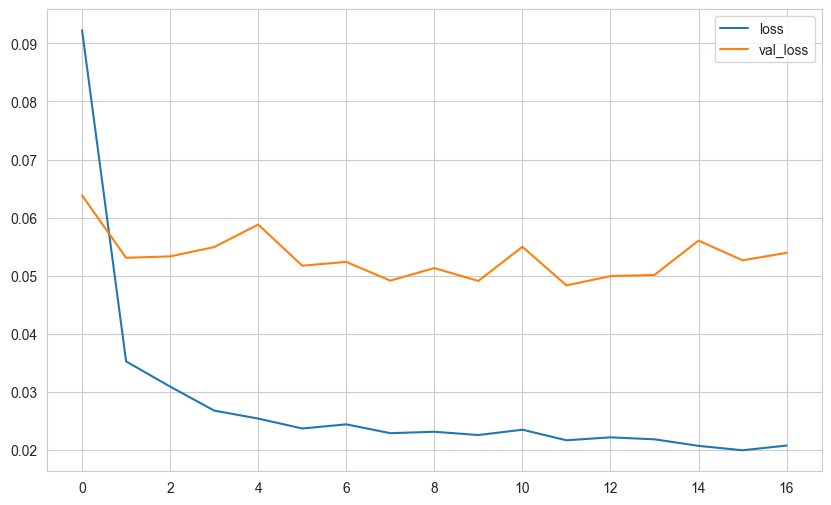

In [306]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
     Evaluate on Test Data
</div>


In [307]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [308]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [309]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [310]:

eval_metrics(y_test, y_pred)

r2_score: 0.8501874391625632 
mae: 0.1601310582659704 
mse: 0.0386321647336658 
rmse: 0.1965506670903607


In [311]:
y_pred.shape

(134, 1)


<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
    Inverse Transformation and Compare
</div>


In [312]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))   
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))     
y_pred_inv = target_transformer.inverse_transform(y_pred)

In [313]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']

In [314]:
pred_test

,test,prediction
0,19.050,20.079
1,18.556,20.735
2,18.167,20.933
3,15.833,20.988
4,17.500,20.406
...,...,...
129,34.500,34.150
130,34.250,34.581
131,32.900,34.359
132,32.875,33.829


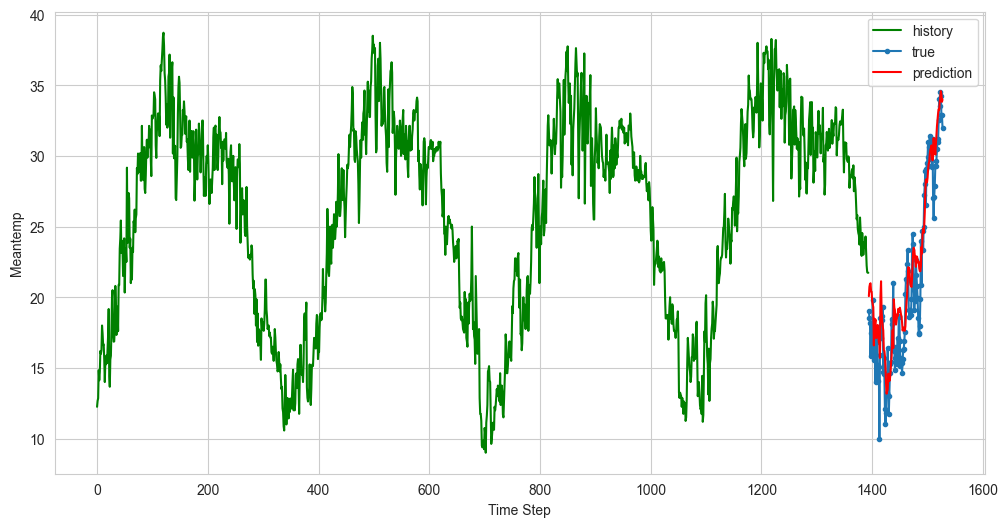

In [315]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Meantemp')
plt.xlabel('Time Step')
plt.legend()
plt.show();

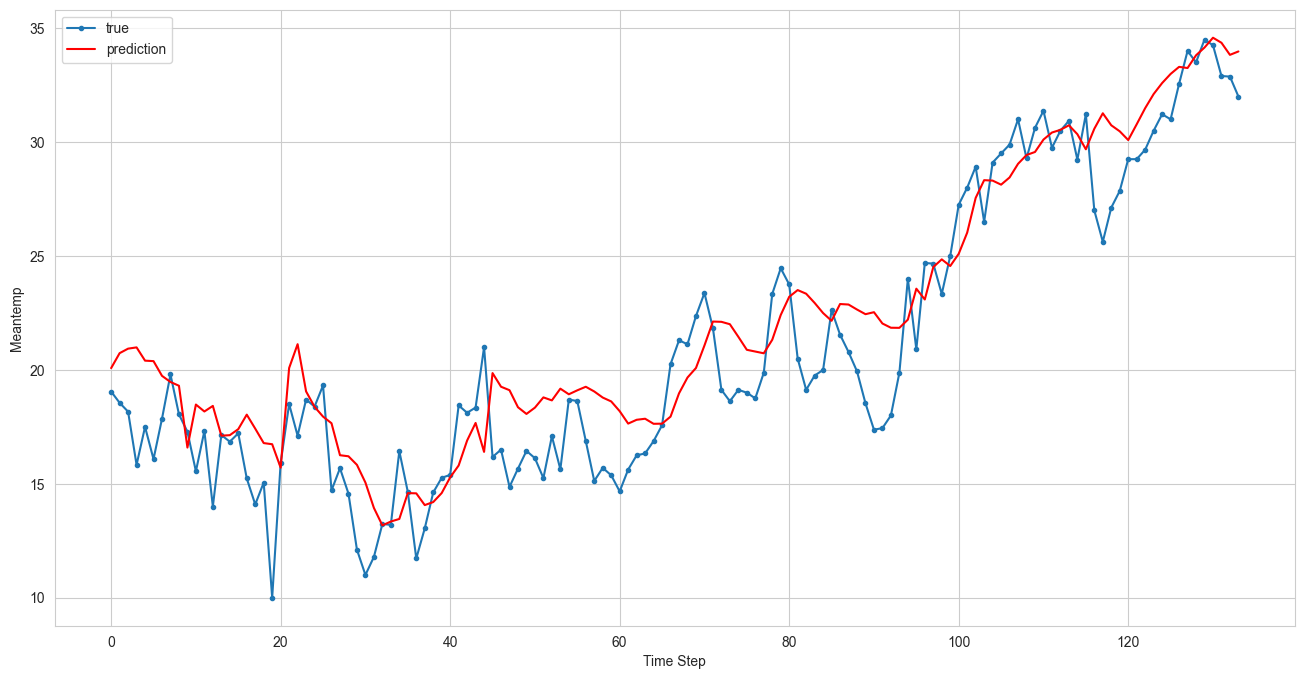

In [316]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Meantemp')
plt.xlabel('Time Step')
plt.legend()
plt.show();

### 
<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
    RNN
</div>


In [317]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [318]:
model = Sequential()

model.add(SimpleRNN(units=128, activation="tanh", input_shape=(time_steps, n_features), return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=64, activation="tanh", return_sequences=True))
model.add(SimpleRNN(units=32, activation="tanh"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="tanh"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")


In [319]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=64, 
          validation_split=0.3,
          callbacks=[early_stop])

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.3262 - val_loss: 0.0913
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0708 - val_loss: 0.0702
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0425 - val_loss: 0.0566
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0347 - val_loss: 0.0623
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0302 - val_loss: 0.0659
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0342 - val_loss: 0.0500
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0284 - val_loss: 0.0537
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0302 - val_loss: 0.0555
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0266 - val_loss: 0.0459
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0250 - val_loss: 0.0533
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0239 - val_loss: 0.0526
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0

<Axes: >

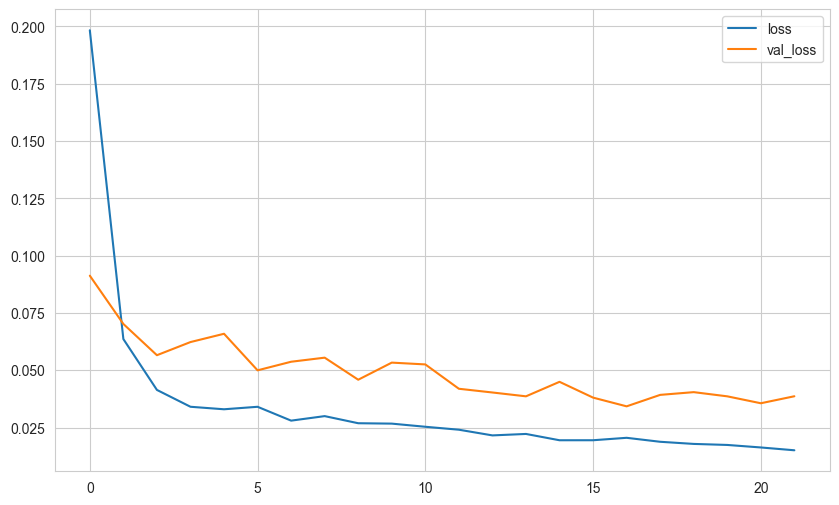

In [320]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
     Evaluate on Test Data
</div>

In [321]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


In [322]:
eval_metrics(y_test, y_pred)

r2_score: 0.7664285654800869 
mae: 0.19498599029231536 
mse: 0.06023106530595436 
rmse: 0.2454201811301474


In [323]:
y_pred.shape

(134, 1)


<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
    Inverse Transformation and Compare
</div>


In [324]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))   
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))   
y_pred_inv = target_transformer.inverse_transform(y_pred)

In [325]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']

In [326]:
pred_test

,test,prediction
0,19.050,16.506
1,18.556,17.125
2,18.167,16.496
3,15.833,16.563
4,17.500,18.098
...,...,...
129,34.500,32.752
130,34.250,33.748
131,32.900,32.793
132,32.875,31.935


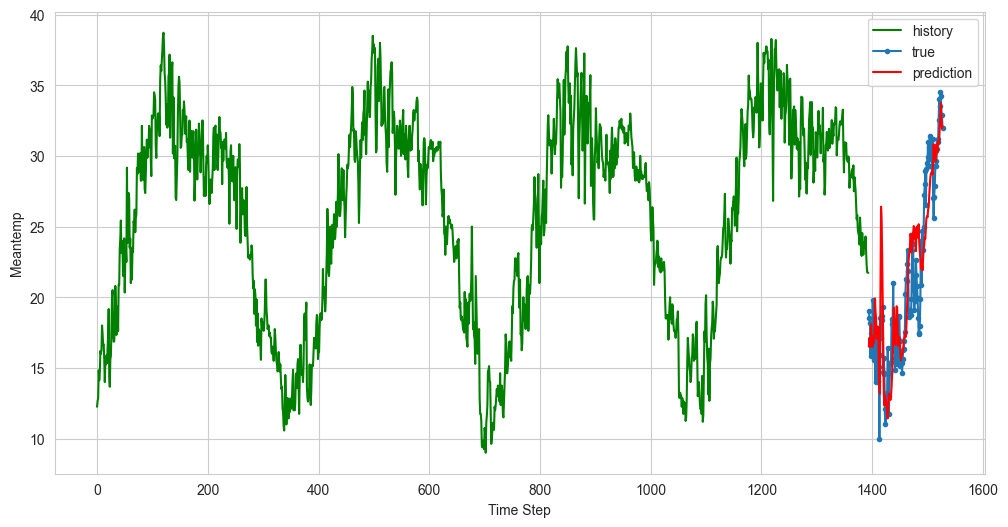

In [327]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Meantemp')
plt.xlabel('Time Step')
plt.legend()
plt.show();

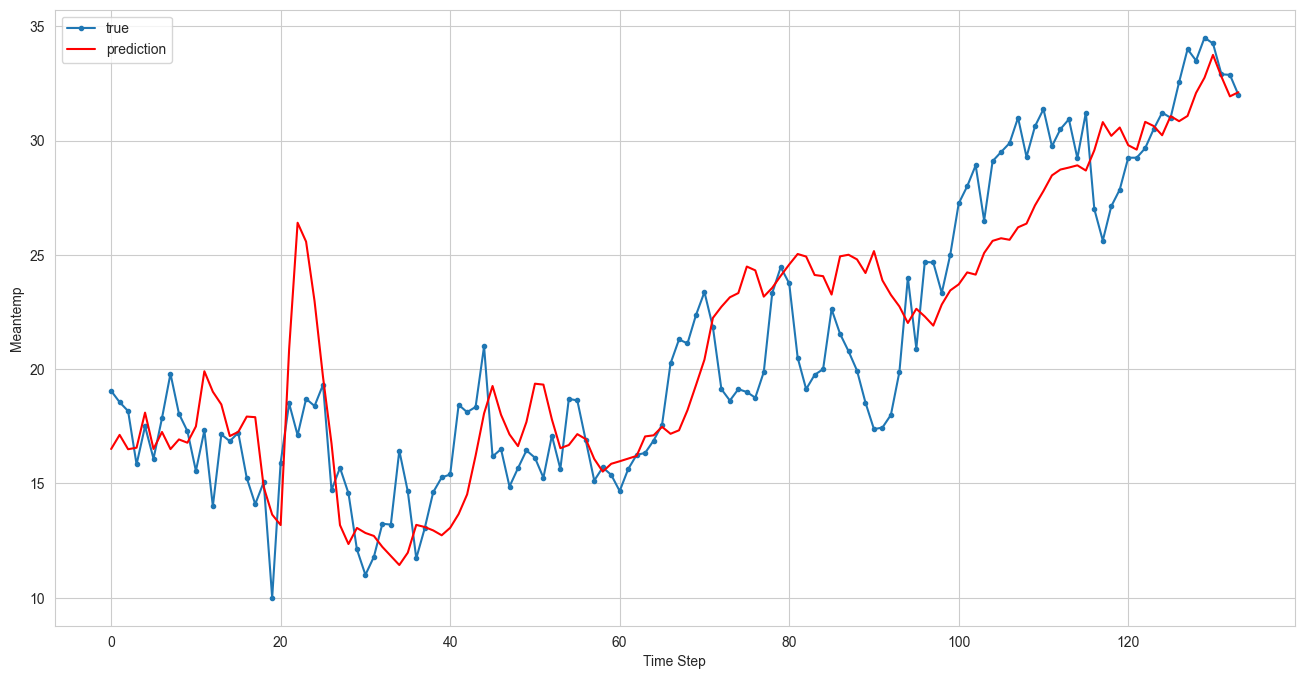

In [328]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Meantemp')
plt.xlabel('Time Step')
plt.legend()
plt.show();


<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
    GRU
</div>


In [329]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [330]:
model = Sequential()
model.add(Bidirectional(GRU(units=128, return_sequences=True, input_shape=(time_steps, n_features))))
model.add(Dropout(rate=0.2))
model.add(Bidirectional(GRU(units=64, return_sequences=True)))
model.add(Bidirectional(GRU(units=32, return_sequences=False)))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_17                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_18                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_19                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [331]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=64, 
          validation_split=0.3,
          callbacks=[early_stop])

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 143ms/step - loss: 0.1968 - val_loss: 0.0385
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0378 - val_loss: 0.0358
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0358 - val_loss: 0.0416
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0336 - val_loss: 0.0320
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0300 - val_loss: 0.0282
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0273 - val_loss: 0.0284
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0269 - val_loss: 0.0257
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0278 - val_loss: 0.0243
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0253 - val_loss: 0.0260
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0228 - val_loss: 0.0229
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0221 - val_loss: 0.0249
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0

<Axes: >

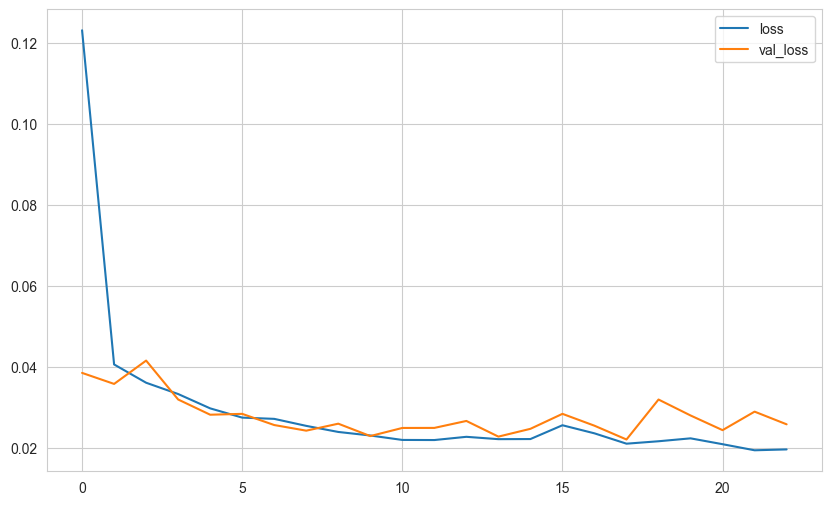

In [332]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
     Evaluate on Test Data
</div>


In [333]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step


In [334]:
eval_metrics(y_test, y_pred)

r2_score: 0.8958118377135013 
mae: 0.13344836002781021 
mse: 0.02686700117967752 
rmse: 0.16391156511874785


In [335]:
y_pred.shape

(134, 1)

In [336]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))   
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))    
y_pred_inv = target_transformer.inverse_transform(y_pred)

In [337]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']

In [338]:
pred_test

,test,prediction
0,19.050,19.247
1,18.556,19.474
2,18.167,19.185
3,15.833,18.709
4,17.500,17.269
...,...,...
129,34.500,33.774
130,34.250,34.196
131,32.900,33.437
132,32.875,32.695


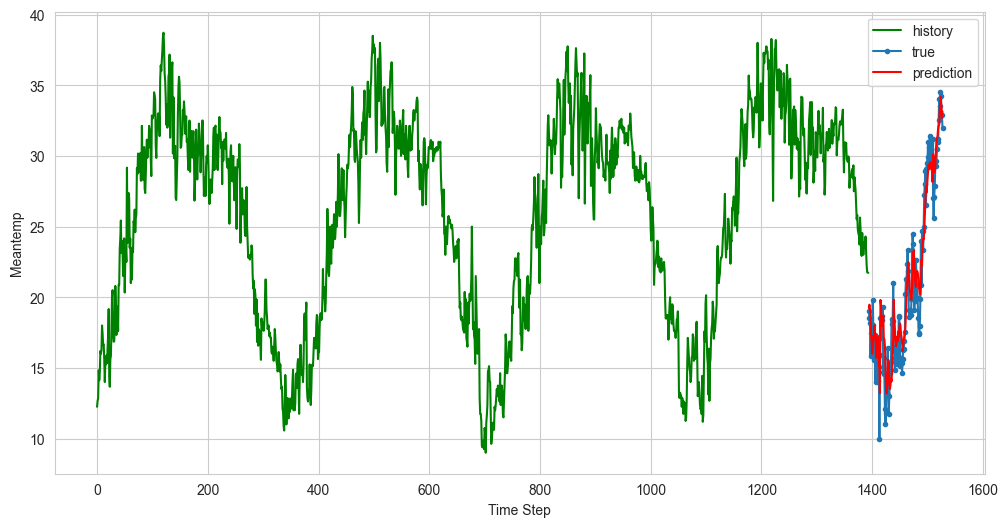

In [339]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Meantemp')
plt.xlabel('Time Step')
plt.legend()
plt.show();

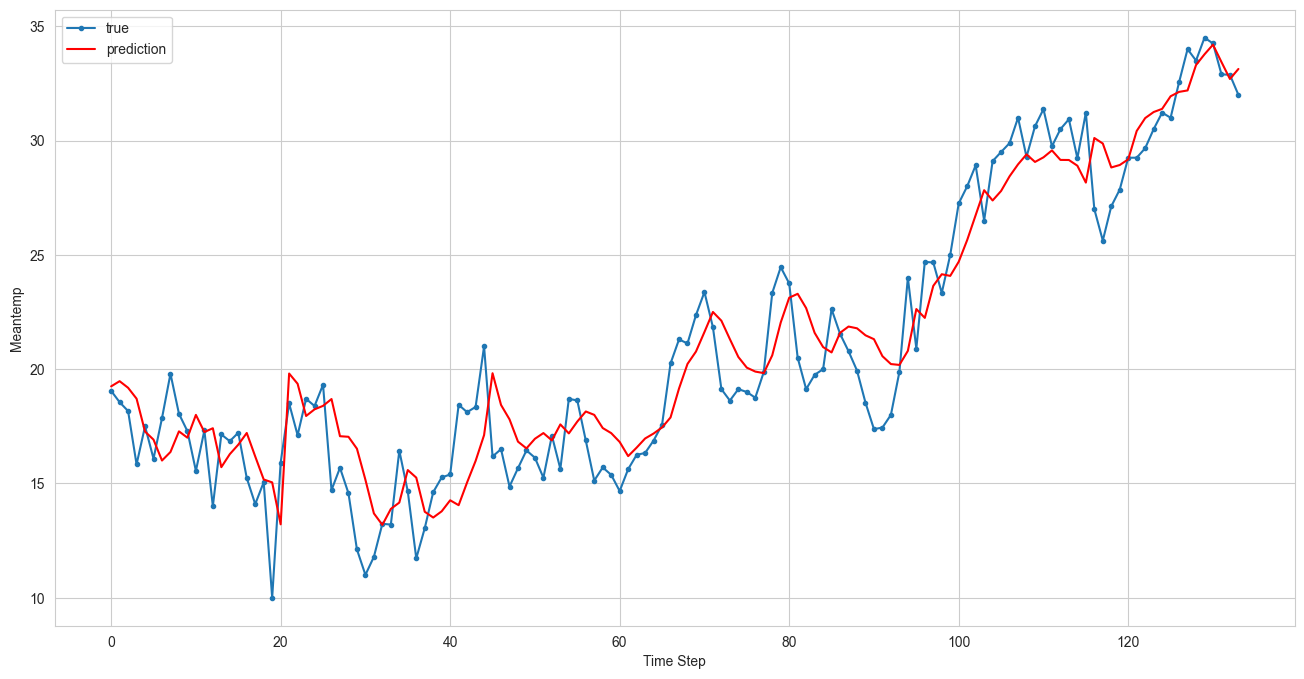

In [340]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Meantemp')
plt.xlabel('Time Step')
plt.legend()
plt.show();